Importing libraries

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

reading the dataset


In [ ]:
alphabet=pd.read_csv('A_Z Handwritten Data.csv')

Splitting into training and testing dataset

In [ ]:
X=alphabet.drop(columns='letters')
y=alphabet['letters']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
##some_alphabet = np.array(X_train.iloc[3297])
##some_alphabet_image = some_alphabet.reshape(28,28)


plt.imshow(some_alphabet_image, cmap=matplotlib.cm.binary)
X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)
##plt.imshow(some_alphabet_image, cmap=matplotlib.cm.binary)
##print(np.array(X_train.iloc[3297]))
##print((np.array(y_train.iloc[3297])))

Reshaping the traing and testing dataset

In [3]:
img_size=28
X_trainr=np.array(X_train).reshape(-1,img_size,img_size,1)
X_testr=np.array(X_test).reshape(-1,img_size,img_size,1)
print(X_trainr.shape)
print(X_testr.shape)

(297960, 28, 28, 1)
(74491, 28, 28, 1)


Loading CNN libraries

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

Training the model

In [214]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape = X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),input_shape = X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),input_shape = X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(26))
model.add(Activation("softmax"))

In [215]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_13 (Activation)   (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_14 (Activation)   (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)         

In [216]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=['accuracy'])
              

In [217]:
model.fit(X_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
6518/6518 [==============================] - 182s 28ms/step - loss: 0.3386 - accuracy: 0.9026 - val_loss: 0.1390 - val_accuracy: 0.9599
Epoch 2/5
6518/6518 [==============================] - 192s 29ms/step - loss: 0.1221 - accuracy: 0.9646 - val_loss: 0.1093 - val_accuracy: 0.9688
Epoch 3/5
6518/6518 [==============================] - 193s 30ms/step - loss: 0.0911 - accuracy: 0.9734 - val_loss: 0.0833 - val_accuracy: 0.9763
Epoch 4/5
6518/6518 [==============================] - 193s 30ms/step - loss: 0.0749 - accuracy: 0.9779 - val_loss: 0.0773 - val_accuracy: 0.9777
Epoch 5/5
6518/6518 [==============================] - 192s 29ms/step - loss: 0.0640 - accuracy: 0.9807 - val_loss: 0.0692 - val_accuracy: 0.9799


In [218]:
test_loss, test_acc = model.evaluate(X_testr,y_test)
print("Test loss",test_loss)
print("validation accuracy",test_acc)

2328/2328 [==============================] - 21s 9ms/step - loss: 0.0724 - accuracy: 0.9787
Test loss 0.07240121066570282
validation accuracy 0.9786819815635681


Testing random predictions

In [219]:
predictions= model.predict(X_testr)
print(np.argmax(predictions[6969]))

4


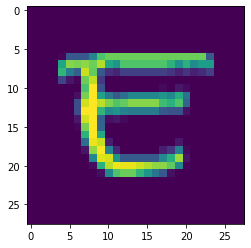

In [220]:
alpha = np.array(X_test.iloc[6969])
alpha_image = alpha.reshape(28,28)
plt.imshow(alpha_image)

Reading image, reshaping, resizing,normalization and prediction

In [221]:
import cv2

The letter is:  G


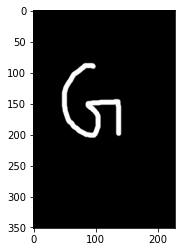

In [255]:
img= cv2.imread('g letter.png')
plt.imshow(img)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
newimg=tf.keras.utils.normalize(resized, axis=1)
newimg= np.array(newimg).reshape(-1,img_size,img_size,1)
newimg.shape
predictions = model.predict(newimg)
convert={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',
         7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',
         14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',
         21:'V',22:'W',23:'X',24:'Y',25:'Z'}
print("The letter is: ",convert[np.argmax(predictions)])

Importing library for saving the model

In [256]:
from keras.models import save_model

Saving the model

In [257]:
model.save('D:\jupyter projects ml\Alphabet_recognition model')

INFO:tensorflow:Assets written to: D:\jupyter projects ml\Alphabet_recognition model\assets
